In [1]:
# Title: P2 - Titanic Population Logs - Data Wrangling
# -*- coding: UTF-8 -*-
# author: Clayton Schuler
# date: 12.2.2016

# Library Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
    # show plots in this document

In [2]:
### Locate and import csv file
filename = 'https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv'
titanic_df = pd.read_csv(filename)        # setting csv file to td (titanic_data) for brevity
td = titanic_df                       

In [3]:
### First look at available information in csv
titanic_df.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [4]:
### Questions to Ask:

#   Did age severely impact survivability?
#   Did sex severely impact survivability?
#   Did the upper classes have significantly more survivors than lower class?
#   Did traveling without family increase survival rate?

In [5]:
### First Look at data and columns for any necessary cleaning

titanic_df.describe()
    # returns error due to uncleaned data

C:\Users\LonelyMerc\Anaconda2\envs\venv\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
### Cleaning: Filling the missing ages in with the median age to minimize skew

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
    # fill all missing ages with the median age
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Question 1: Did age severely impact survivability?

There is greater survival rates for those under 9.
The small sample size prevents us from determining a trend for the very old.

The under-9 survival rate is: 0.67
Median age (28yo) survival rate is: 0.29



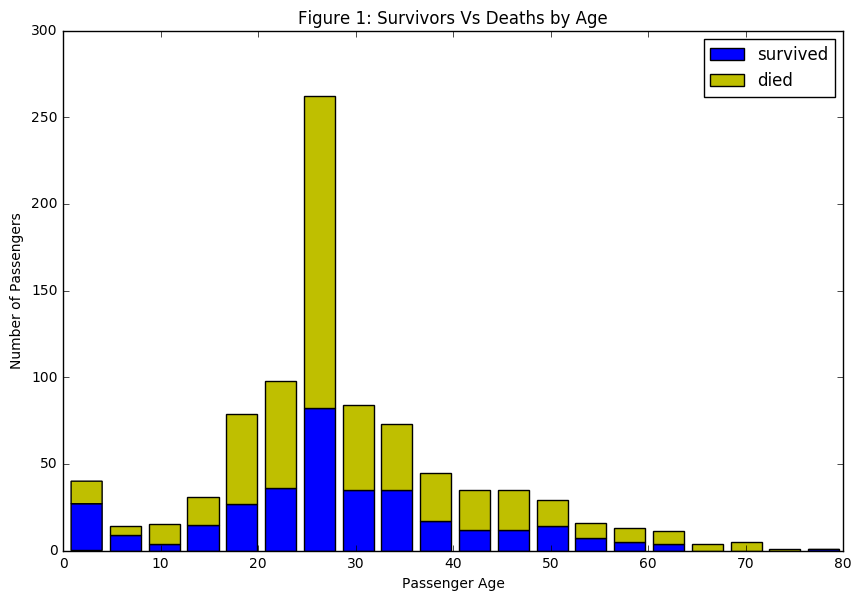

In [7]:
### Looking at survivability by Age

# Definitions:
age_survivors = td[td['Survived']==1]['Age']
    # separate survivors by age
age_deaths = td[td['Survived']==0]['Age']
    # separate deaths by age
under_9_surv_rate = td[td['Age']<9]['Survived'].mean()
    # mean survival rate for all passengers 10 years old and under
median_age = td['Age'].median()
    # median age of all passengers
median_age_surv_rate = td[td['Age']==median_age]['Survived'].mean()
    # average survival rate of the median age of passengers

# Text Explanation
print "Question 1: Did age severely impact survivability?\n"
print "There is greater survival rates for those under 9.\
\nThe small sample size prevents us from determining a trend for the very old.\
\n\nThe under-9 survival rate is: %.2f\nMedian age (%dyo) survival rate is: %.2f\n"\
% (under_9_surv_rate, median_age, median_age_surv_rate)

# Figure 1: Survivors Vs Deaths by Age
plt.hist([age_survivors, age_deaths], bins=20, stacked=True, color=['b','y'])
    # makes histogram of survivors vs deaths by age, filing them into like bins
plt.legend(['survived','died'], loc='upper right')
plt.title("Figure 1: Survivors Vs Deaths by Age")
plt.xlabel('Passenger Age')
plt.ylabel('Number of Passengers')
plt.subplots_adjust(left=0.0, right=1.3, bottom=0.0, top=1.3)


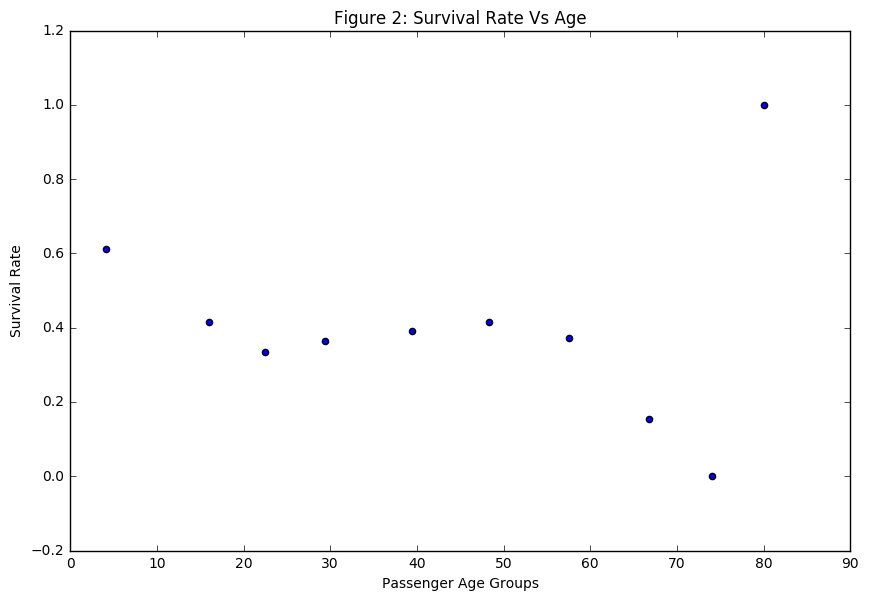

In [8]:
# Figure 2: Survival Rate Vs Age:

# Binning the sample size by Age
age = td['Age']
num_bins = 10
bins_by_age = np.linspace(age.min(), age.max(), num_bins)
    # determining evenly spaced bins from min age to max age
group_by_bin = td.groupby(np.digitize(age, bins_by_age))
    # groups the data by age into bins_by_age
mean_age_bins, survival_rate_by_age = group_by_bin['Age'].mean(), group_by_bin['Survived'].mean()
    # determine mean age and survival rate values of each bin
    
# Making binned survival rate by age datafram
age_survival_mean_bins = pd.DataFrame({"Survive": survival_rate_by_age, "Age": mean_age_bins})
    # new DataFrame of mean survival rate and mean age of bins

# Making scatterplot from new dataframe to show survival rates by different ages
plt.scatter(age_survival_mean_bins.Age, age_survival_mean_bins.Survive)
plt.title('Figure 2: Survival Rate Vs Age')
plt.xlabel('Passenger Age Groups')
plt.ylabel('Survival Rate')
plt.subplots_adjust(left=0.0, right=1.3, bottom=0.0, top=1.3)

Question 2: Did sex severely impact survivability?

Yes, Females had significantly higher survival rate:
female survival rate: 0.74
male survival rate: 0.19



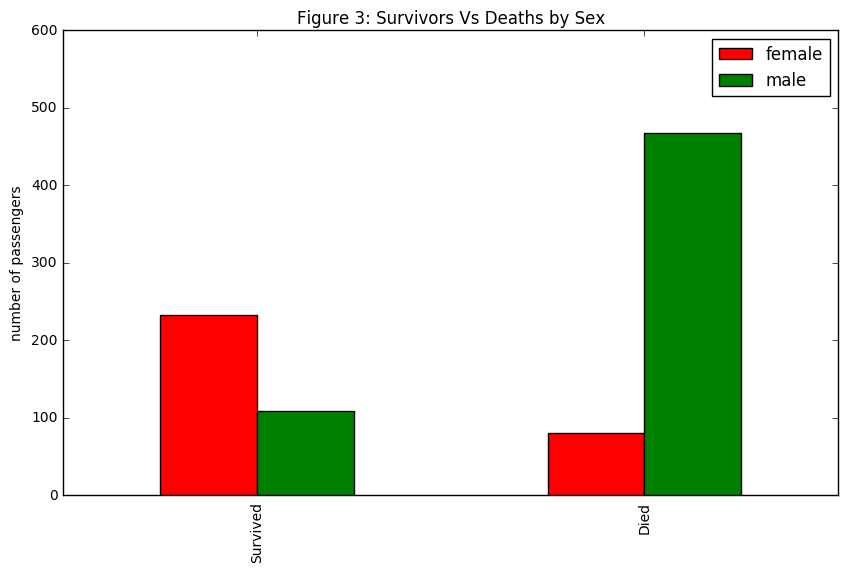

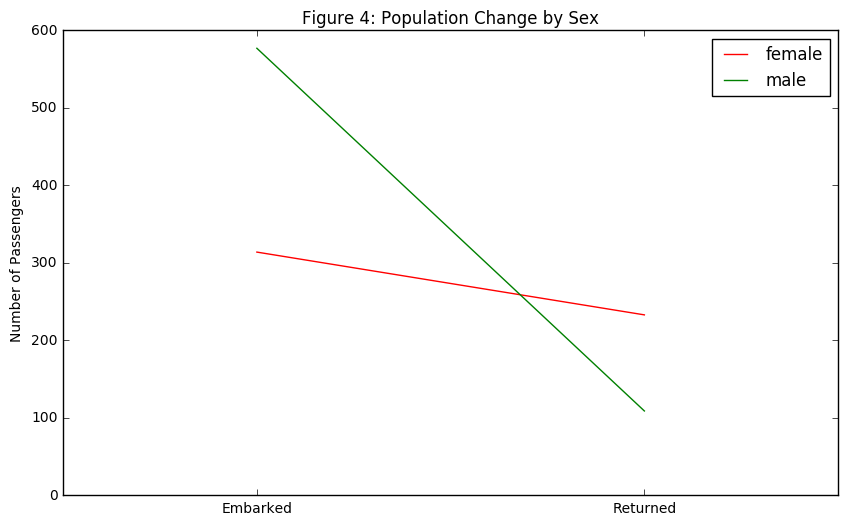

In [9]:
### Looking at survivability by Sex

total_number_by_sex = td['Sex'].value_counts()
    # totals number of males and females
sex_survived = td[td['Survived']==1]['Sex'].value_counts()
    # number survivors by sex
sex_died = td[td['Survived']==0]['Sex'].value_counts()
    # number died by sex
survival_rate_sex = sex_survived / total_number_by_sex
    # survival rate by sex

# Text Explanation
print "Question 2: Did sex severely impact survivability?\n"
print "Yes, Females had significantly higher survival rate:\nfemale survival rate: %.2f\nmale survival rate: %.2f\n"\
                                                                % (survival_rate_sex.female, survival_rate_sex.male)
# Figure 3: Survivors Vs Deaths by Sex

sex_compared = pd.DataFrame([sex_survived, sex_died])
    # new DataFrame of survivors vs deaths by sex
sex_compared.index = ['Survived','Died']
ax = sex_compared.plot(kind='bar', color='rg', title='Figure 3: Survivors Vs Deaths by Sex',\
                       ylim=[0,600], figsize=[10,6])
ax.set_ylabel('number of passengers')

# Figure 4: Population Change by Sex

sex_population = pd.DataFrame([total_number_by_sex, sex_survived])
    # new DataFrame of total vs survivors by sex
sex_population.index = ['Embarked','Returned']
ax = sex_population.plot(kind='line', color='rg', title="Figure 4: Population Change by Sex",\
                         xlim=[-.5,1.5], xticks=[0,1], ylim=[0,600], figsize=[10,6])
ax.legend(['female', 'male'])
ax.set_ylabel('Number of Passengers')

Question 3: Did the upper classes have significantly more survivors than lower class?

Yes. Pclass 1, the highest class, had significantly more survivors than Pclass 3, the lowest:
Pclass1 survival rate: 0.63
Pclass2 survival rate: 0.47
Pclass3 survival rate: 0.24



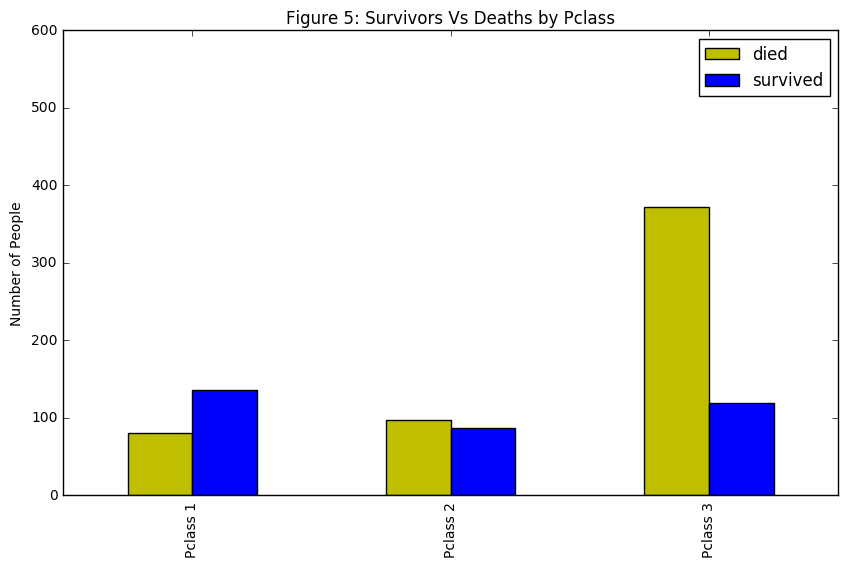

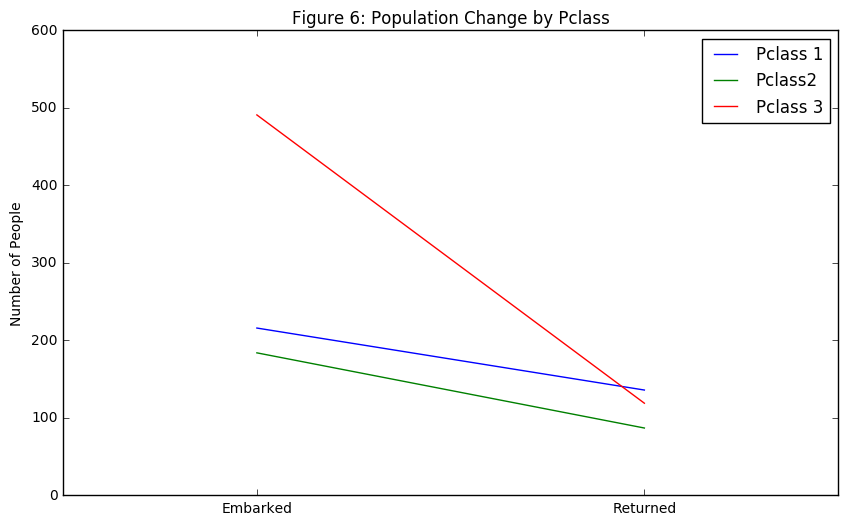

In [10]:
### Looking at survivability by Pclass

# Definitions:
class_totals = td['Pclass'].value_counts()      # total number in each Pclass
# survived (0=='no' or 1=='yes') for Pclasses:
class1 = td[td['Pclass']==1]['Survived'].value_counts()
class2 = td[td['Pclass']==2]['Survived'].value_counts()
class3 = td[td['Pclass']==3]['Survived'].value_counts()
# survival rate of classes (using float to prevent floor divide):
class1_rate = float(class1[1]) / class_totals[1]
class2_rate = float(class2[1]) / class_totals[2]
class3_rate = float(class3[1]) / class_totals[3]

# Text Explanation
print "Question 3: Did the upper classes have significantly more survivors than lower class?\n"
print "Yes. Pclass 1, the highest class, had significantly more survivors than Pclass 3, the lowest:\
\nPclass1 survival rate: %.2f\nPclass2 survival rate: %.2f\nPclass3 survival rate: %.2f\n"\
% (class1_rate, class2_rate, class3_rate)

# Figure 5: Survivors Vs Deaths by Pclass
class_relation = pd.DataFrame([class1,class2,class3])
    # new DataFrame cleanly putting class survival counts together
class_relation.index = ['Pclass 1', 'Pclass 2', 'Pclass 3']
ax = class_relation.plot(kind='bar',color=['y','b'], ylim=[0,600],\
                         title="Figure 5: Survivors Vs Deaths by Pclass", figsize=[10,6])
ax.legend(['died','survived'],loc='best')
ax.set_ylabel('Number of People')

# Figure 6: Population Change by Pclass
class_survived = td[td['Survived']==1]['Pclass'].value_counts()
    # only survival numbers by Pclass
class_population = pd.DataFrame([class_totals,class_survived])
    # new DataFrame cleanly to cleanly plot poulation change
class_population.index = ['Embarked','Returned']
ax = class_population.plot(kind='line', xlim=[-.5, 1.5], xticks=[0,1], ylim=[0,600],\
                     title="Figure 6: Population Change by Pclass", figsize=[10,6])
ax.legend(['Pclass 1', 'Pclass2', 'Pclass 3'])
ax.set_ylabel('Number of People')

Question 5:  Did traveling alone increase survival rate?

No, traveling without family decreased survival rate:
Without family survival rate: 0.30
With family survival rate: 0.51



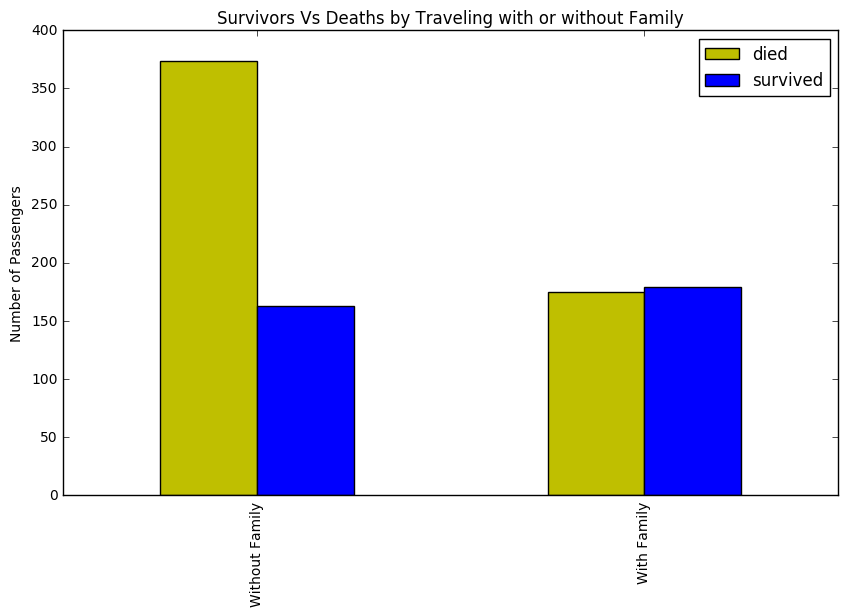

In [11]:
### Looking at Survivability by Traveling with Vs without Family

code_wfamily = np.logical_or(td['Parch']>0, td['SibSp']>0)
    # returns boolean array for whether passenger has Parent/Child >0 OR Sibling/Spouse >0
solo = td[np.logical_and(td['SibSp']==0, td['Parch']==0)]['Survived'].value_counts()
    # choose all passengers without any SiblingSpouse or ParentChild
family = td[code_wfamily]['Survived'].value_counts()
    # choose all passengers with a SiblingSpouse or a ParentChild
total_with_family = td.groupby(code_wfamily)['Name'].count()    
    # total number of passengers (True) with family and (False) without family
rate_solo = float(solo[1]) / total_with_family[False]
    #survival rate of a solo traveler (using float to prevent floor divide)
rate_with_fam = float(family[1]) / total_with_family[True]
    # survival rate of a traveler with family (using float to prevent floor divide)

# Text Explanation
print "Question 5:  Did traveling alone increase survival rate?\n"
print "No, traveling without family decreased survival rate:\
\nWithout family survival rate: %.2f\nWith family survival rate: %.2f\n"\
% (rate_solo, rate_with_fam)

# Figure 7: Survivors Vs Deaths by Traveling with or without Family
familied = pd.DataFrame([solo, family])
    # new DataFrame with solo and family travelers to plot cleanly
familied.index = ['Without Family','With Family']
ax = familied.plot(kind='bar', color='yb', title="Survivors Vs Deaths by Traveling with or without Family", figsize=[10,6])
ax.legend(['died','survived'])
ax.set_ylabel('Number of Passengers')

In [12]:
### Conclusion

# show ratio of children who also travel with family
under9 = td[td['Age']<9]
    # all passengers under 9 years old
under9_wfam = under9.groupby(code_wfamily)
    # all passengers under 9 years old traveling with family. code_wfamily defined above
ratio_under9_wfam = under9_wfam['Age'].count()[True] / float(under9['Age'].count())
    # ratio of children under 9 traveling with family
    
# show distributions of Pclass by Sex
pclass_by_sex = td.groupby('Sex')['Pclass'].value_counts()
    # grouping Pclass apart by Sex
males_to_females_class = pclass_by_sex.loc['male'] / pclass_by_sex.loc['female']
    # number of males to each female by Pclass

print """In conclusion, it appears that in regards to survival rates for passengers
on the Titanic, there is a correlation between survival rates and age, and an even
greater correlation between survival and sex and survival and status (Pclass) and
traveling with family. Survival rates were much greater for children (8 years and
under), though otherwise, correlation seemed to drop off. Females tended to have
significantly greater survival rates with a mean of 74% survival to the 19% male
survival. Pclass 1 had a much higher 63% survival, to the 47% survival of Pclass 2,
and low 23% survival of Pclass 3. Additionally, being partied up with family correlated
with greater survival rates as well, with 51% survival to 30% survival without.\n\n"""

print "It should be acknowledged that there is overlap in these study divisions, for example,\
\nchildren under 8 were traveling with family %.2f percent of the time and females were\
\ndistributed more heavily in the wealthier classes than males, with %.2f males per female\
\nin Pclass 1, %.2f in Pclass 2, and %.3f males for each female in Pclass 3.\n\n" \
% (ratio_under9_wfam*100, males_to_females_class[1], males_to_females_class[2], males_to_females_class[3])

print """This analysis of data helps the viewer to mentally break down correlations
of survability of the Titanic desaster based on a number of factors. Additional steps
would be to create a machine learning algorithm to predict passengers' survival
given other details about their profile."""

In conclusion, it appears that in regards to survival rates for passengers
on the Titanic, there is a correlation between survival rates and age, and an even
greater correlation between survival and sex and survival and status (Pclass) and
traveling with family. Survival rates were much greater for children (8 years and
under), though otherwise, correlation seemed to drop off. Females tended to have
significantly greater survival rates with a mean of 74% survival to the 19% male
survival. Pclass 1 had a much higher 63% survival, to the 47% survival of Pclass 2,
and low 23% survival of Pclass 3. Additionally, being partied up with family correlated
with greater survival rates as well, with 51% survival to 30% survival without.


It should be acknowledged that there is overlap in these study divisions, for example,
children under 8 were traveling with family 98.15 percent of the time and females were
distributed more heavily in the wealthier classes than males, with 1.30 males per female